In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/jayad/Documents/Datasets/Crude Oil Prices 97-2025/commodities_dataset.csv")

df.head()


,Date,"Crude_Oil_WTI_('Close', 'CL=F')","Crude_Oil_WTI_('High', 'CL=F')","Crude_Oil_WTI_('Low', 'CL=F')","Crude_Oil_WTI_('Open', 'CL=F')","Crude_Oil_WTI_('Volume', 'CL=F')","Crude_Oil_Brent_('Close', 'BZ=F')","Crude_Oil_Brent_('High', 'BZ=F')","Crude_Oil_Brent_('Low', 'BZ=F')","Crude_Oil_Brent_('Open', 'BZ=F')",...,"Lumber_('Close', 'LBS=F')","Lumber_('High', 'LBS=F')","Lumber_('Low', 'LBS=F')","Lumber_('Open', 'LBS=F')","Lumber_('Volume', 'LBS=F')",Year,Month,Quarter,Day_of_Week,Week_of_Year
0,1997-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1997,10,4,2,44
1,1997-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1997,10,4,3,44
2,1997-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1997,10,4,4,44
3,1997-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1997,11,4,0,45
4,1997-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1997,11,4,1,45


In [2]:
list(df.columns)

['Date',
 "Crude_Oil_WTI_('Close', 'CL=F')",
 "Crude_Oil_WTI_('High', 'CL=F')",
 "Crude_Oil_WTI_('Low', 'CL=F')",
 "Crude_Oil_WTI_('Open', 'CL=F')",
 "Crude_Oil_WTI_('Volume', 'CL=F')",
 "Crude_Oil_Brent_('Close', 'BZ=F')",
 "Crude_Oil_Brent_('High', 'BZ=F')",
 "Crude_Oil_Brent_('Low', 'BZ=F')",
 "Crude_Oil_Brent_('Open', 'BZ=F')",
 "Crude_Oil_Brent_('Volume', 'BZ=F')",
 "Natural_Gas_('Close', 'NG=F')",
 "Natural_Gas_('High', 'NG=F')",
 "Natural_Gas_('Low', 'NG=F')",
 "Natural_Gas_('Open', 'NG=F')",
 "Natural_Gas_('Volume', 'NG=F')",
 "Heating_Oil_('Close', 'HO=F')",
 "Heating_Oil_('High', 'HO=F')",
 "Heating_Oil_('Low', 'HO=F')",
 "Heating_Oil_('Open', 'HO=F')",
 "Heating_Oil_('Volume', 'HO=F')",
 "Gasoline_('Close', 'RB=F')",
 "Gasoline_('High', 'RB=F')",
 "Gasoline_('Low', 'RB=F')",
 "Gasoline_('Open', 'RB=F')",
 "Gasoline_('Volume', 'RB=F')",
 "Gold_('Close', 'GC=F')",
 "Gold_('High', 'GC=F')",
 "Gold_('Low', 'GC=F')",
 "Gold_('Open', 'GC=F')",
 "Gold_('Volume', 'GC=F')",
 "Silver_

In [3]:
close_df = df[['Date'] + [c for c in df.columns if "Close" in c]]


In [4]:
long_df = close_df.melt(
    id_vars='Date',
    var_name='Commodity',
    value_name='Close'
)


In [5]:
long_df.head()


,Date,Commodity,Close
0,1997-10-29,"Crude_Oil_WTI_('Close', 'CL=F')",NaN
1,1997-10-30,"Crude_Oil_WTI_('Close', 'CL=F')",NaN
2,1997-10-31,"Crude_Oil_WTI_('Close', 'CL=F')",NaN
3,1997-11-03,"Crude_Oil_WTI_('Close', 'CL=F')",NaN
4,1997-11-04,"Crude_Oil_WTI_('Close', 'CL=F')",NaN


In [6]:
long_df = long_df.dropna(subset=['Close'])
long_df.head()


,Date,Commodity,Close
708,2000-08-23,"Crude_Oil_WTI_('Close', 'CL=F')",32.049999
709,2000-08-24,"Crude_Oil_WTI_('Close', 'CL=F')",31.629999
710,2000-08-25,"Crude_Oil_WTI_('Close', 'CL=F')",32.049999
711,2000-08-28,"Crude_Oil_WTI_('Close', 'CL=F')",32.869999
712,2000-08-29,"Crude_Oil_WTI_('Close', 'CL=F')",32.720001


In [7]:
long_df['Commodity'] = (
    long_df['Commodity']
        .str.split("_\\(").str[0]
        .str.replace("_", " ")
)

long_df['Commodity'].unique()[:10]


array(['Crude Oil WTI', 'Crude Oil Brent', 'Natural Gas', 'Heating Oil',
       'Gasoline', 'Gold', 'Silver', 'Platinum', 'Palladium', 'Copper'],
      dtype=object)

In [8]:
long_df.isna().sum()


Date         0
Commodity    0
Close        0
dtype: int64

In [9]:
long_df['Commodity'].value_counts().head()

long_df['Close'].describe()


count    153509.000000
mean        478.412415
std         803.296782
min         -37.630001
25%          31.195000
50%         135.050003
75%         601.500000
max       12565.000000
Name: Close, dtype: float64

###Gold trends and analysis I

Gold Price trend, average price for commodity and volatility:

<Axes: title={'center': 'Gold Price Trend'}, xlabel='Date'>

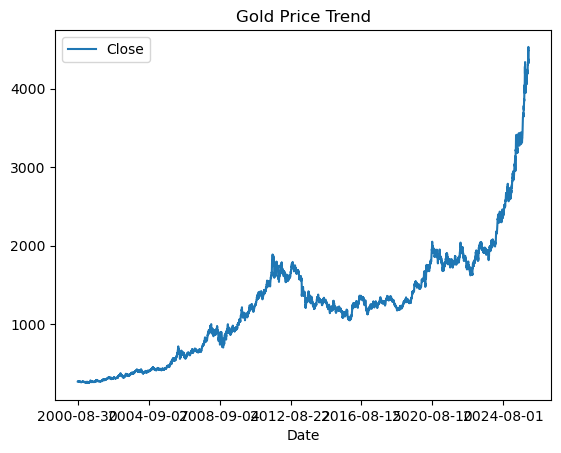

In [10]:
#Gold Price Trend:
gold = long_df[long_df['Commodity'] == 'Gold']
gold.plot(x='Date', y='Close', title='Gold Price Trend')


In [11]:
#Average price by commodity: 
long_df.groupby('Commodity')['Close'].mean().sort_values(ascending=False)


Commodity
Cocoa              2716.050452
Aluminum           2200.759493
Gold               1252.131860
Rice               1166.348724
Soybeans           1007.327911
Platinum           1006.739502
Palladium           851.825219
Wheat               537.660269
Corn                411.882083
Lumber              355.762345
Oats                282.878798
Orange Juice        154.366328
Feeder Cattle       146.808121
Coffee              142.801917
Live Cattle         117.316470
Crude Oil Brent      78.044446
Lean Hogs            73.744157
Cotton               71.537269
Crude Oil WTI        64.662687
Silver               17.969416
Sugar                15.059537
Natural Gas           4.395895
Copper                2.844066
Heating Oil           2.006295
Gasoline              1.921570
Name: Close, dtype: float64

In [12]:
#Volatility:
long_df.groupby('Commodity')['Close'].std().sort_values(ascending=False)


Commodity
Cocoa              1795.404852
Gold                730.270725
Palladium           621.269387
Platinum            393.540655
Rice                393.184971
Aluminum            380.245658
Soybeans            325.533567
Lumber              192.646085
Wheat               179.038302
Corn                157.090047
Oats                116.152045
Orange Juice         83.204787
Coffee               70.200935
Feeder Cattle        56.395743
Live Cattle          36.403854
Crude Oil WTI        24.584397
Cotton               24.160103
Crude Oil Brent      23.801892
Lean Hogs            17.188238
Silver                9.694934
Sugar                 5.880216
Natural Gas           2.204256
Copper                1.172743
Heating Oil           0.812344
Gasoline              0.714082
Name: Close, dtype: float64

In [13]:
pip install duckdb

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
import duckdb

conn = duckdb.connect("commodities.duckdb")


In [15]:
conn.execute("""
    CREATE OR REPLACE TABLE commodity_prices AS
    SELECT * FROM long_df
""")


In [16]:
df_sql = conn.execute("""
    SELECT
        Commodity,
        AVG(Close) AS avg_price
    FROM commodity_prices
    GROUP BY Commodity
    ORDER BY avg_price DESC
""").df()


In [17]:
conn.execute("""
    SELECT *
    FROM read_csv_auto('C:/Users/jayad/Documents/VSCode/Crudeoils 97-25/Crudeoils 97-25 v2/dataset/commodities_dataset.csv')
    LIMIT 10
""").df()


,Date,"Crude_Oil_WTI_('Close', 'CL=F')","Crude_Oil_WTI_('High', 'CL=F')","Crude_Oil_WTI_('Low', 'CL=F')","Crude_Oil_WTI_('Open', 'CL=F')","Crude_Oil_WTI_('Volume', 'CL=F')","Crude_Oil_Brent_('Close', 'BZ=F')","Crude_Oil_Brent_('High', 'BZ=F')","Crude_Oil_Brent_('Low', 'BZ=F')","Crude_Oil_Brent_('Open', 'BZ=F')",...,"Lumber_('Close', 'LBS=F')","Lumber_('High', 'LBS=F')","Lumber_('Low', 'LBS=F')","Lumber_('Open', 'LBS=F')","Lumber_('Volume', 'LBS=F')",Year,Month,Quarter,Day_of_Week,Week_of_Year
0,1997-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1997,10,4,2,44
1,1997-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1997,10,4,3,44
2,1997-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1997,10,4,4,44
3,1997-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1997,11,4,0,45
4,1997-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1997,11,4,1,45
5,1997-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1997,11,4,2,45
6,1997-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1997,11,4,3,45
7,1997-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1997,11,4,4,45
8,1997-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1997,11,4,0,46
9,1997-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1997,11,4,1,46


In [18]:
conn.execute("""
    SELECT COUNT(*) AS rows, COUNT(DISTINCT Commodity) AS commodities
    FROM commodity_prices
""").df()


,rows,commodities
0,153509,25


In [19]:
conn.execute("""
    SELECT COUNT(*) 
    FROM commodity_prices 
    WHERE Close IS NULL
""").df()


,count_star()
0,0


In [20]:
conn.execute("SHOW TABLES").df()

,name
0,commodity_prices


In [21]:
import duckdb

conn = duckdb.connect("commodities.duckdb")

#Average price per commodity

query = """
SELECT
    Commodity,
    AVG(Close) AS avg_price
FROM commodity_prices
GROUP BY Commodity
ORDER BY avg_price DESC
"""

df_avg = conn.execute(query).df()
df_avg.head()


,Commodity,avg_price
0,Cocoa,2716.050452
1,Aluminum,2200.759493
2,Gold,1252.131860
3,Rice,1166.348724
4,Soybeans,1007.327911


In [22]:
#Volatility

query = """
SELECT Commodity, STDDEV(Close) AS volatility
FROM commodity_prices
GROUP BY Commodity
ORDER BY volatility DESC;

"""

df_avg = conn.execute(query).df()
df_avg.head()

,Commodity,volatility
0,Cocoa,1795.404852
1,Gold,730.270725
2,Palladium,621.269387
3,Platinum,393.540655
4,Rice,393.184971


In [23]:
query = """
SELECT
    Date,
    Commodity,
    Close,
    AVG(Close) OVER (
        PARTITION BY Commodity
        ORDER BY Date
        ROWS BETWEEN 29 PRECEDING AND CURRENT ROW
    ) AS ma_30,
    AVG(Close) OVER (
        PARTITION BY Commodity
        ORDER BY Date
        ROWS BETWEEN 89 PRECEDING AND CURRENT ROW
    ) AS ma_90
FROM commodity_prices
ORDER BY Commodity, Date
"""

df_ma = conn.execute(query).df()
df_ma.head()


,Date,Commodity,Close,ma_30,ma_90
0,2014-05-06,Aluminum,2172.75,2172.7500,2172.7500
1,2014-05-07,Aluminum,2149.00,2160.8750,2160.8750
2,2014-05-08,Aluminum,2141.75,2154.5000,2154.5000
3,2014-05-09,Aluminum,2107.25,2142.6875,2142.6875
4,2014-05-12,Aluminum,2088.25,2131.8000,2131.8000


In [24]:
pivot_df = conn.execute("""
    SELECT Date, Commodity, Close
    FROM commodity_prices
""").df().pivot(
    index='Date',
    columns='Commodity',
    values='Close'
)


In [25]:
corr = pivot_df.corr()
corr


Commodity,Aluminum,Cocoa,Coffee,Copper,Corn,Cotton,Crude Oil Brent,Crude Oil WTI,Feeder Cattle,Gasoline,...,Natural Gas,Oats,Orange Juice,Palladium,Platinum,Rice,Silver,Soybeans,Sugar,Wheat
Commodity,,,,,,,,,,,,,,,,,,,,,
Aluminum,1.000000,0.287848,0.596668,0.802567,0.590452,0.633753,0.711456,0.716891,0.382720,0.676680,...,0.550436,0.708361,0.297400,0.288515,0.309449,0.331344,0.506182,0.546834,0.362612,0.594920
Cocoa,0.287848,1.000000,0.744810,0.565180,0.227187,0.172111,-0.031042,0.240497,0.764608,0.270104,...,-0.284732,0.325512,0.777406,0.176478,0.214278,0.428403,0.601950,0.273337,0.405729,0.213554
Coffee,0.596668,0.744810,1.000000,0.790851,0.569929,0.524745,0.257419,0.513373,0.756710,0.559927,...,-0.141360,0.576774,0.609782,0.317087,0.511020,0.547749,0.851854,0.550776,0.648506,0.499529
Copper,0.802567,0.565180,0.790851,1.000000,0.729019,0.603790,0.496470,0.736900,0.634072,0.776583,...,-0.120498,0.743932,0.570242,0.535393,0.646420,0.765224,0.856188,0.743104,0.706899,0.722088
Corn,0.590452,0.227187,0.569929,0.729019,1.000000,0.713171,0.709482,0.742334,0.301021,0.797215,...,-0.107339,0.777675,0.248690,0.452409,0.618624,0.789777,0.721839,0.920226,0.679775,0.876851
Cotton,0.633753,0.172111,0.524745,0.603790,0.713171,1.000000,0.522050,0.604578,0.209253,0.642483,...,-0.099139,0.659942,0.228106,0.381251,0.524027,0.555136,0.579792,0.683214,0.680085,0.635045
Crude Oil Brent,0.711456,-0.031042,0.257419,0.496470,0.709482,0.522050,1.000000,0.974124,-0.028419,0.949891,...,0.477262,0.522492,0.086119,-0.156764,0.632785,0.610229,0.343948,0.719484,0.401219,0.652832
Crude Oil WTI,0.716891,0.240497,0.513373,0.736900,0.742334,0.604578,0.974124,1.000000,0.272291,0.958744,...,0.207248,0.662808,0.284909,0.180700,0.761510,0.762555,0.573362,0.764709,0.616491,0.769253
Feeder Cattle,0.382720,0.764608,0.756710,0.634072,0.301021,0.209253,-0.028419,0.272291,1.000000,0.369453,...,-0.339243,0.423132,0.672233,0.365174,0.182491,0.427937,0.677382,0.392944,0.397786,0.245905


In [ ]:
conn.close()